In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import time
%matplotlib inline

* train.csv 파일 불러오기

In [26]:
t1 = time.time()
mnist_train_data_path = "data/train.csv"
# pd.read_csv와 유사한데, 조금 다른 부분이 있어서... sep = ",", header=None, 
# 1개의 픽셀의 데이터가 -0~255-> 8비트 데이터입니다1!!!
train = np.genfromtxt(mnist_train_data_path, delimiter=",", skip_header =1 ).astype(np.dtype("uint8"))
t2 = time.time()
print("Process Time :" + str(t2-t1))
print(len(train)) # 데이터 갯수....

Process Time :21.13416051864624
42000


In [4]:
train.shape

(42000, 785)

* test.csv 불러오기

In [27]:
t1 = time.time()
mnist_test_data_path = "data/test.csv"
# pd.read_csv와 유사한데, 조금 다른 부분이 있어서... sep = ",", header=None, 
# 1개의 픽셀의 데이터가 -0~255-> 8비트 데이터입니다1!!!
test = np.genfromtxt(mnist_test_data_path, delimiter=",", skip_header =1 ).astype(np.dtype("uint8"))
t2 = time.time()
print("Process Time :" + str(t2-t1))
print(len(test)) # 데이터 갯수....

Process Time :13.889742136001587
28000


In [6]:
test.shape

(28000, 784)

* train 데이터의 컬럼에는 뭐가 섞여 있나요? --> 정답지와 문제지.....
----> 분리를!!!

In [28]:
# train --> 모의고사 문제와 정답지가 같이 존재!!!!!!!!!!!! -> 2차원 데이터1!!!-> 가로/세로의 관점으로 각각 바라보기!!!!
# 모의고사 문제만!!! label이 맨 앞0열에 있음.
train_data = train[:,1:]
# 모의고사 정답만!!!!
train_labels = train[:,0]

# 확인
print(train_data.shape)
print(train_labels.shape)

(42000, 784)
(42000,)


* 0~9까지 모의고사 정답지의 선지의 분포가 어떻게 되는지 확인!!!!!

In [7]:
cat, cnt  = np.unique(train_labels, return_counts=True) # 유니크한 값 뭐가...몇 개 인가...
print(cat, cnt)

[0 1 2 3 4 5 6 7 8 9] [4132 4684 4177 4351 4072 3795 4137 4401 4063 4188]


* 실제 데이터를 보는 간단한 방법 : 히트맵

In [8]:
import seaborn as sns

In [12]:
train_data[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

1


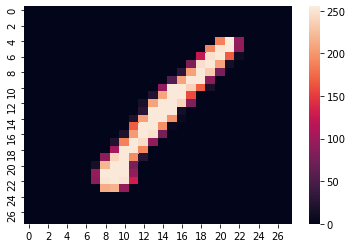

In [11]:
idx = 0

# 1줄 데이터--> 1차원 데이터
sns.heatmap(np.reshape(train_data[idx], (28,28)))
print(train_labels[idx])

* 사용할 모델은 knn만!!!

In [9]:
from sklearn.neighbors import KNeighborsClassifier # sickit learn 해당 모델을 명확하게 분류!!! 회귀!!!! 다른용도인지.!!!!!!
# 명확하게 사용할 모델을 불어와야 함!!!!!!!
from sklearn.metrics import accuracy_score # 자동 채점기---> accuracy 값을 알려주는.....

In [13]:
t1 =time.time()

# 1) 모델 불러오기!!!!-> 모델 불러오면서 파라미터도 세팅을 동시에...
knn = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

# 2) 학습
knn. fit(train_data, train_labels)

t2 = time.time()
print(str(t2-t1))

# 3) 학습한 모델을 가지고 예측!!!
pred = knn.predict(test)

# 4) --> 이 채점을...실제 kaggle에 올려야지만 가능함!!!!!!!!!!!!!!
pred[:5]

0.005992412567138672


array([2, 0, 9, 9, 3], dtype=uint8)

In [11]:
pred.shape

(28000,)

* 실제 kaggle에 제출하기 위한 양식 만들기!!! -> 시험지에 문제는 풀었고, OMR 카드에 마킹한다!!!

In [14]:
img_id= []
# 1~28000까지의 연속되는 숫자 ---> range
for i in range(1, len(test)+1,1):
    img_id.append(i)
# img_id 리스트에 1~28000가지 숫자가 기입이 됨!!!!

pre_MNIST = pd.DataFrame({
    "ImageId" : img_id,
    "Label" : pred
})
# 컬럼은 ImageID, Label--> 2개의 컬럼!!!

out_path = "mnist_test.csv"
pre_MNIST.to_csv(out_path, index=False)

* 784개의 특징을 가지고 하는 것 보다는...테두리 등에 거의 0으로 의미 없는 것들이 있으니..pca로 한 번 줄여서 제출해 보세요!!!!!!!!
지금 같이 한 경우 이외에 본인이 생각한 대로 2번 정도 하셔서
업로드를 해보시길 바랍니다!!!

# PCA

In [15]:
from sklearn.decomposition import PCA

In [16]:
num_comp = 40
pca = PCA(n_components = num_comp) # 셋팅만

In [17]:
pca.fit(train_data) # pca에 자동 업데이트(변동성이 큰 40개 부분만)

PCA(n_components=40)

In [18]:
np.sum(pca.explained_variance_ratio_)  # 변동성이 큰 40개 부분으로 78%정도 설명할 수 있음. 

0.7871290538309348

In [ ]:
# 이제 784개를 40개의 피처로 줄이자.
# 기준은 train
# 변경대상은 train, test

In [19]:
train_ext = pca.fit_transform(train_data)
print(train_ext.shape)

(42000, 40)


In [33]:
test_ext = pca.transform(test)
print(test_ext.shape)

(28000, 40)


# 정규화 작업

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
min_max_scaler = MinMaxScaler()

In [34]:
# PCA를 적용한 학습용 데이터를 기준으로 minMax 기준.
# PCA 적용된 학습용 데이터, PCA가 적용된 실전 데이터를 동일한 기준으로 모두 변경
train_norm = min_max_scaler.fit_transform(train_ext)
test_norm = min_max_scaler.transform(test_ext)

In [39]:
knn = KNeighborsClassifier(n_neighbors=3,n_jobs=-1)

In [40]:
# 모의고사 문제, 모의고사 정답지
# 모의고사 문제 - PCA 40으로 변형.(정규화 한 문제지)
# 정답지는 그대로
knn.fit(train_norm, train_labels)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [41]:
knn.predict(test_norm)
pred[:5]

array([2, 0, 9, 9, 3], dtype=uint8)

In [42]:
img_id= []
# 1~28000까지의 연속되는 숫자 ---> range
for i in range(1, len(test)+1,1):
    img_id.append(i)
# img_id 리스트에 1~28000가지 숫자가 기입이 됨!!!!

pre_MNIST = pd.DataFrame({
    "ImageId" : img_id,
    "Label" : pred
})
# 컬럼은 ImageID, Label--> 2개의 컬럼!!!

out_path = "mnist_test_pca_minmax.csv"
pre_MNIST.to_csv(out_path, index=False)